In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os 
import sys

import warnings
warnings.filterwarnings('ignore')

In [2]:
append_path= os.path.dirname(os.getcwd())

In [3]:
sys.path.append(append_path)

In [4]:
data_path = os.path.join(append_path,"Data")
data_path = os.path.join(data_path,"insurance_claims.csv")

In [5]:
fraud_df = pd.read_csv(data_path)

In [6]:
fraud_dfcp = fraud_df.copy()

In [7]:
fraud_dfcp.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
fraud_dfcp.shape

(1000, 40)

In [9]:
print(fraud_dfcp.isna().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
fraud_dfcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
fraud_dfcp.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


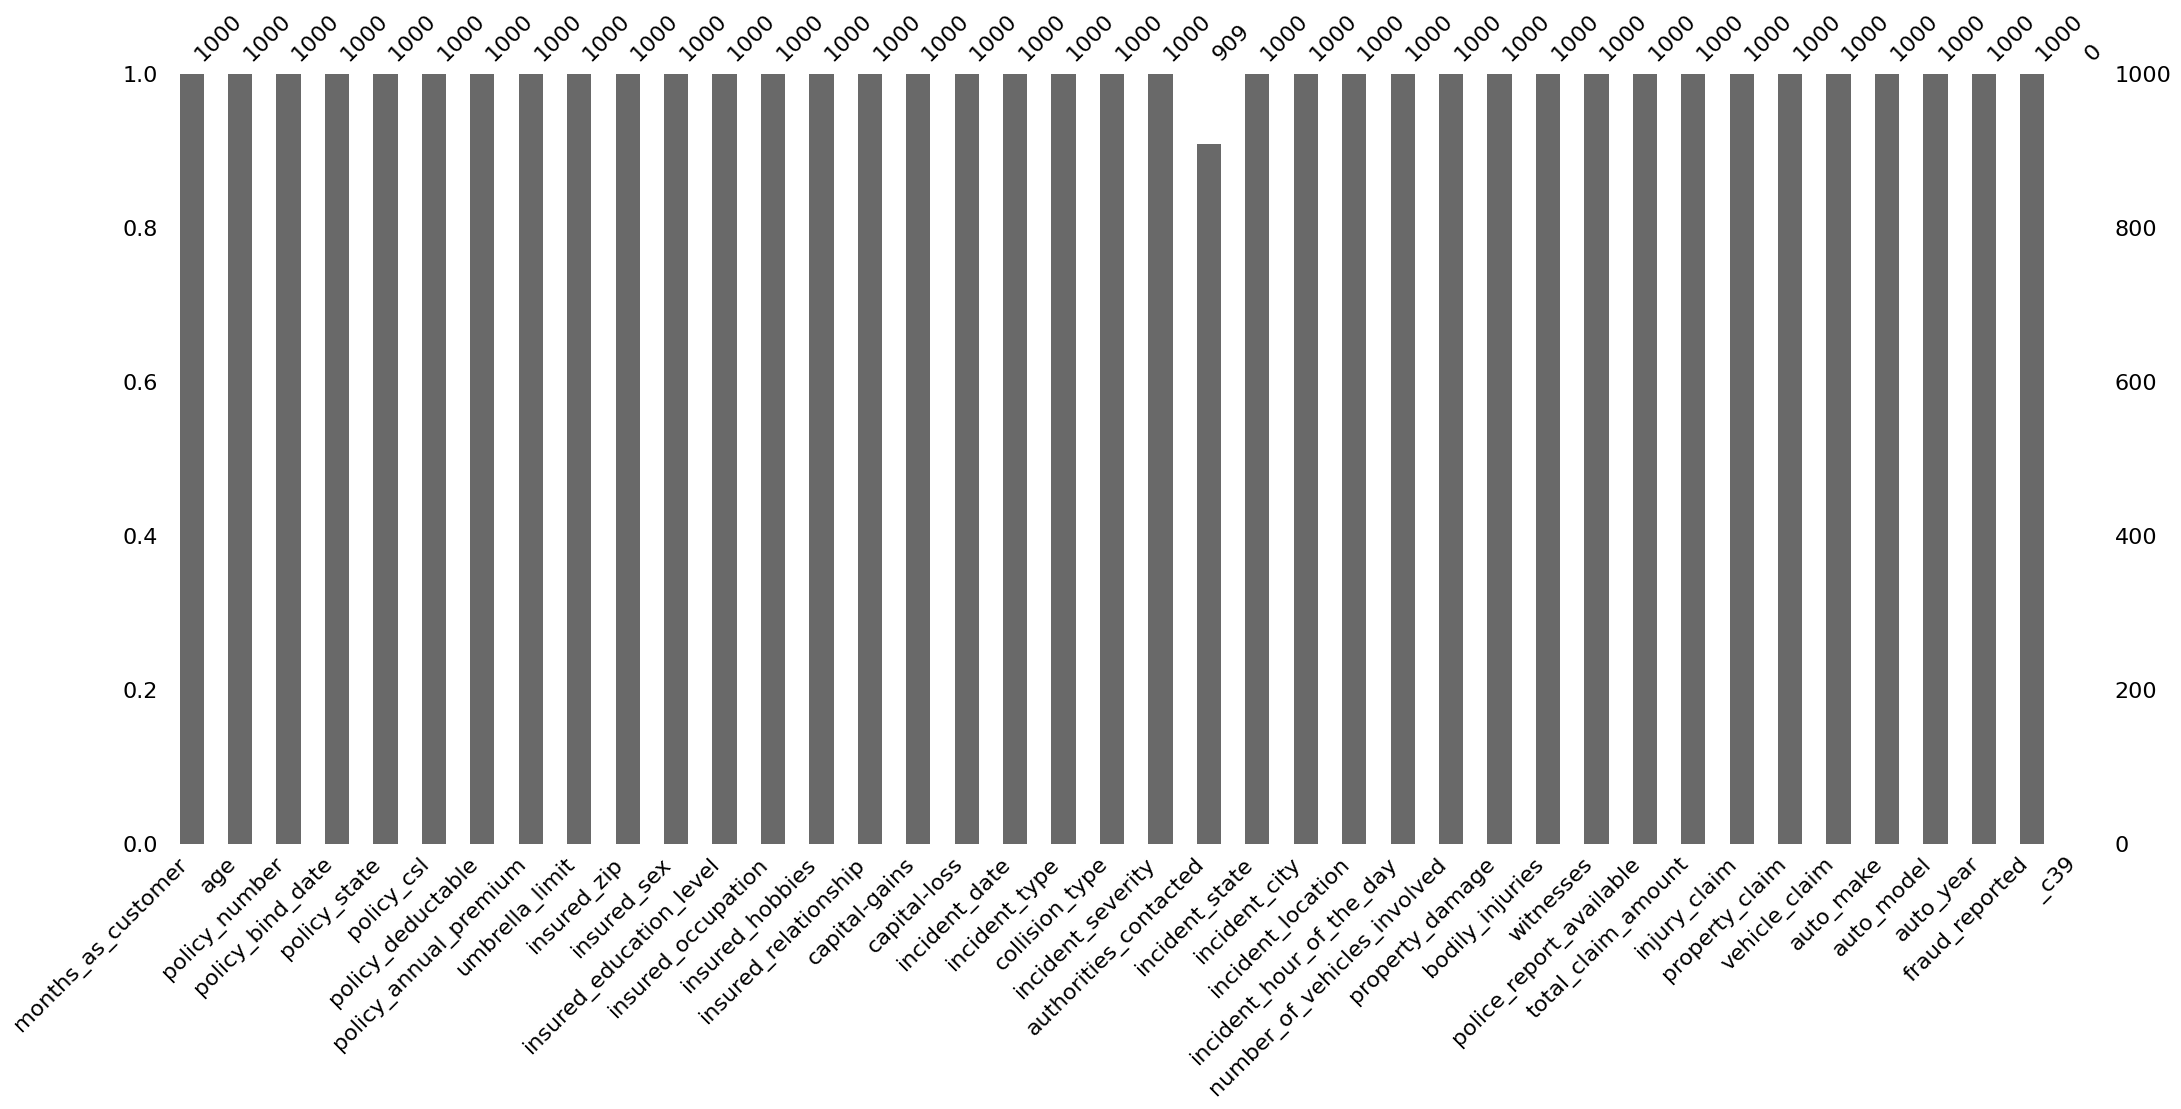

In [12]:
msno.bar(fraud_dfcp)
plt.show()

In [13]:
#Fill Nan w/ observations that appear most frequently
fraud_dfcp["authorities_contacted"]= fraud_dfcp["authorities_contacted"].fillna(fraud_dfcp["authorities_contacted"].mode()[0])

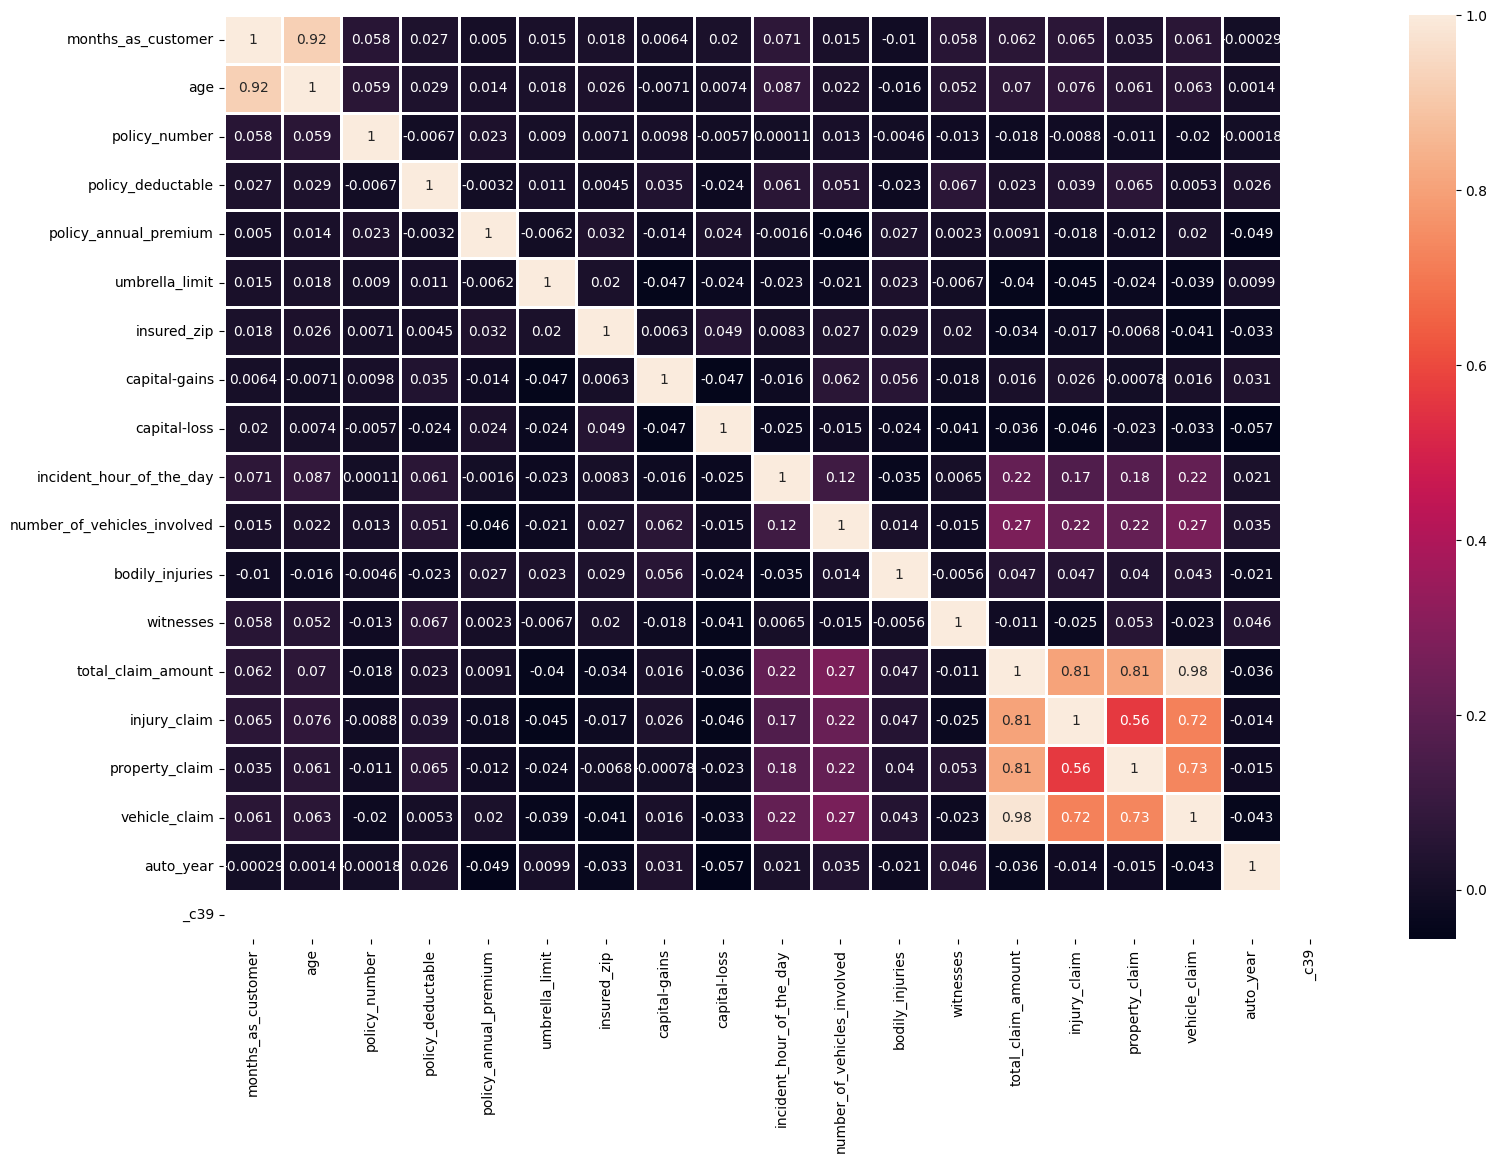

In [14]:
plt.figure(figsize= (18,12))

corr = fraud_dfcp.corr(numeric_only=True)
sns.heatmap(data= corr, annot= True, fmt= ".2g", linewidth=1)
plt.show()

In [15]:
fraud_dfcp.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [16]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

fraud_dfcp.drop(to_drop, inplace = True, axis = 1)

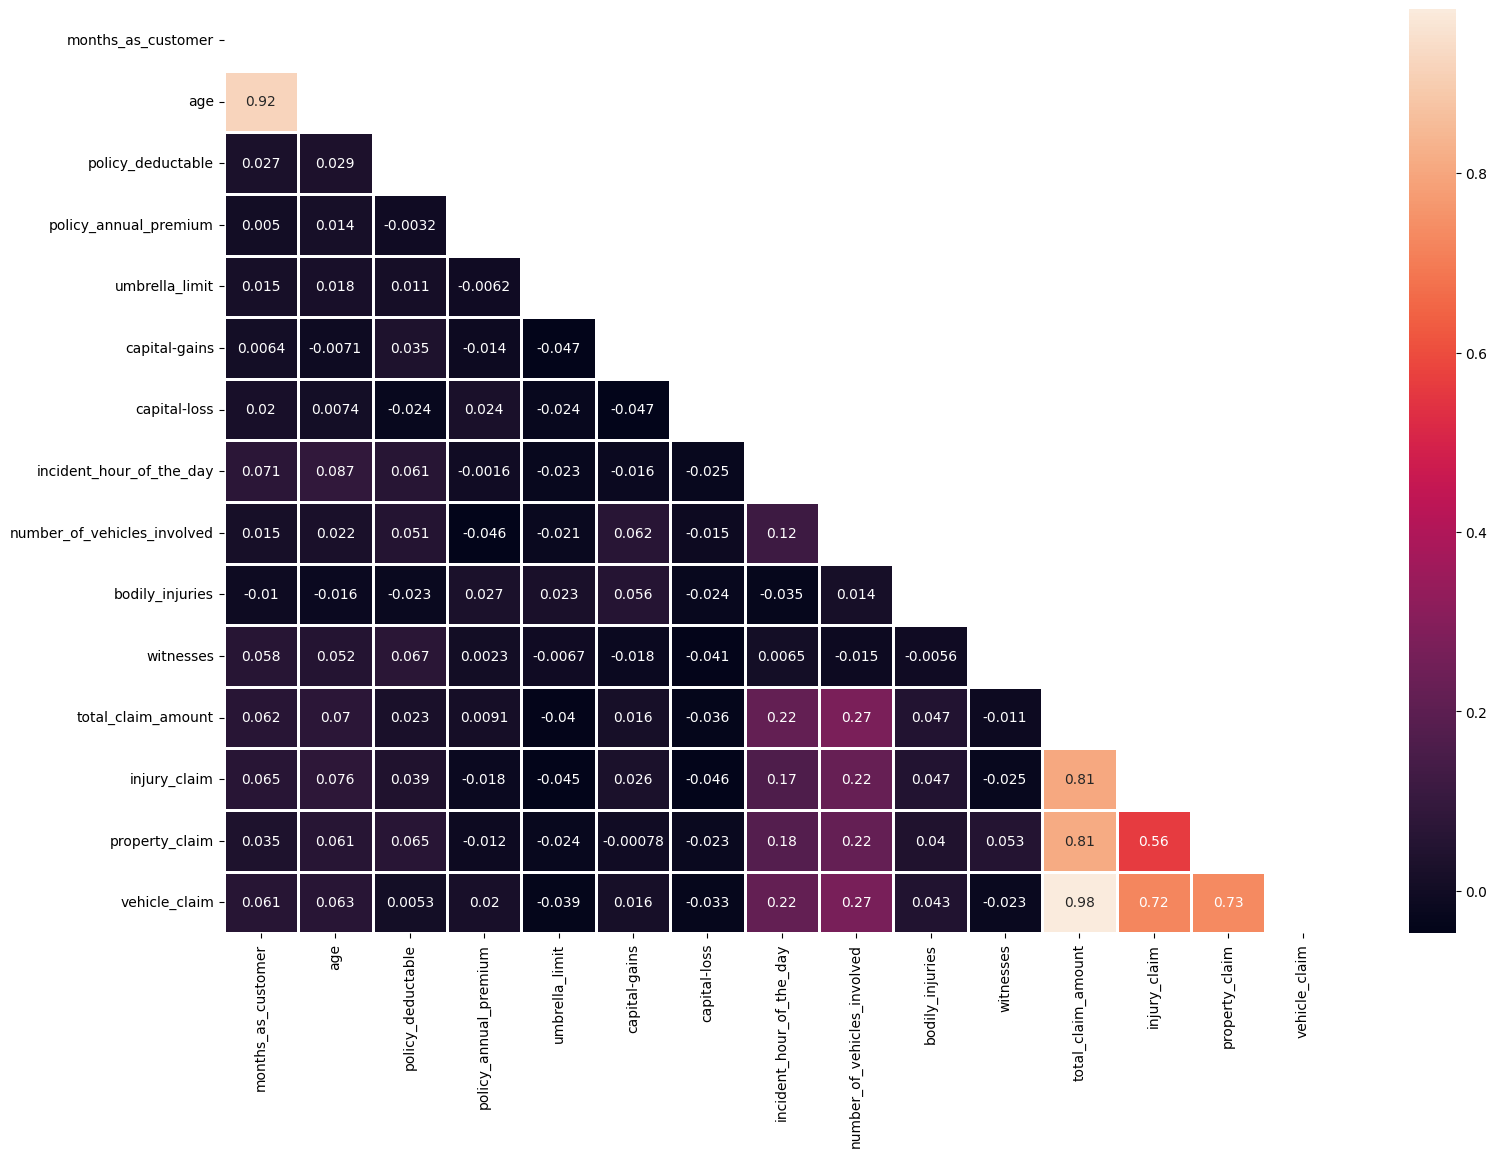

In [17]:
plt.figure(figsize = (18, 12))

corr = fraud_dfcp.corr(numeric_only= True)
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

* Correlation Matrix measures & reveals linear correlation
* Dropping Redundant Featues:
    * "age" & "months_as_customer" are nearly identical. Dropping "age"
    * "total_claim_amount_" is the sum of "injury_claim", "property_claim", & "vehicle_claim" Dropping "total_claim_amount"
* Reason to Drop:
    * Redundant features waste computation & may dilute feature importance.
    * Redundant features inflate model complexity, especially in smaller datasets.
    

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  


In [19]:
vif_data = pd.DataFrame()
# vif_data["Feature"] = fraud_dfcp.columns  
# vif_data["VIF"] = [variance_inflation_factor(fraud_dfcp.values, i) for i in range(fraud_dfcp.shape[1])]  
# vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]  


In [20]:
fraud_dfcp_numeric = fraud_dfcp.select_dtypes(include=['int', 'float'])
vif_data["Feature"] = fraud_dfcp_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(fraud_dfcp_numeric.values, i) for i in range(fraud_dfcp_numeric.shape[1])]

In [21]:
vif_data

,Feature,VIF
0,months_as_customer,18.374090
1,age,65.889481
2,policy_deductable,4.421654
3,policy_annual_premium,19.994994
4,umbrella_limit,1.235073
5,capital-gains,1.821686
6,capital-loss,1.920120
7,incident_hour_of_the_day,4.040036
8,number_of_vehicles_involved,4.577519
9,bodily_injuries,2.455081


* Variance Inflation Factor- Detect and quantify the serverity of multicollinearity. Measures linear correlation.
* Very High Multicollinearity (VIF > 10): "age", "policy_annual_premium", "months_as_customer"
* Perfect Multicollinearity (Vif = Infinity): "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"
* Moderate/Low Multicollineairty (VIF < 5): Safe to retain

* Conclusion: Further evidence on "age" & "total_claim_amount"

In [22]:
fraud_dfcp.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [23]:
X = fraud_dfcp.drop("fraud_reported", axis=1)
y = fraud_dfcp["fraud_reported"]

In [24]:
#Preparing Categorical Columns

In [39]:
cat_df= X.select_dtypes(include= ["object"])

In [40]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [41]:
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [48]:
cat_df= cat_df.drop(labels=["police_report_available_NO","property_damage_NO"], axis=1)

In [51]:
#Extracting numerical columns
num_df = X.select_dtypes(include=["int64"])

In [52]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [56]:
#combining numerical & categorical dataframes to generate final dataset for training
X = pd.concat([num_df, cat_df], axis=1)

In [57]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,False,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,False,False,True,False,False,False,False,True,False,False


In [77]:
cols = [x for x in X.select_dtypes(include=["int64"])]

In [76]:
bools = [x for x in X.select_dtypes(include=["bool"])]

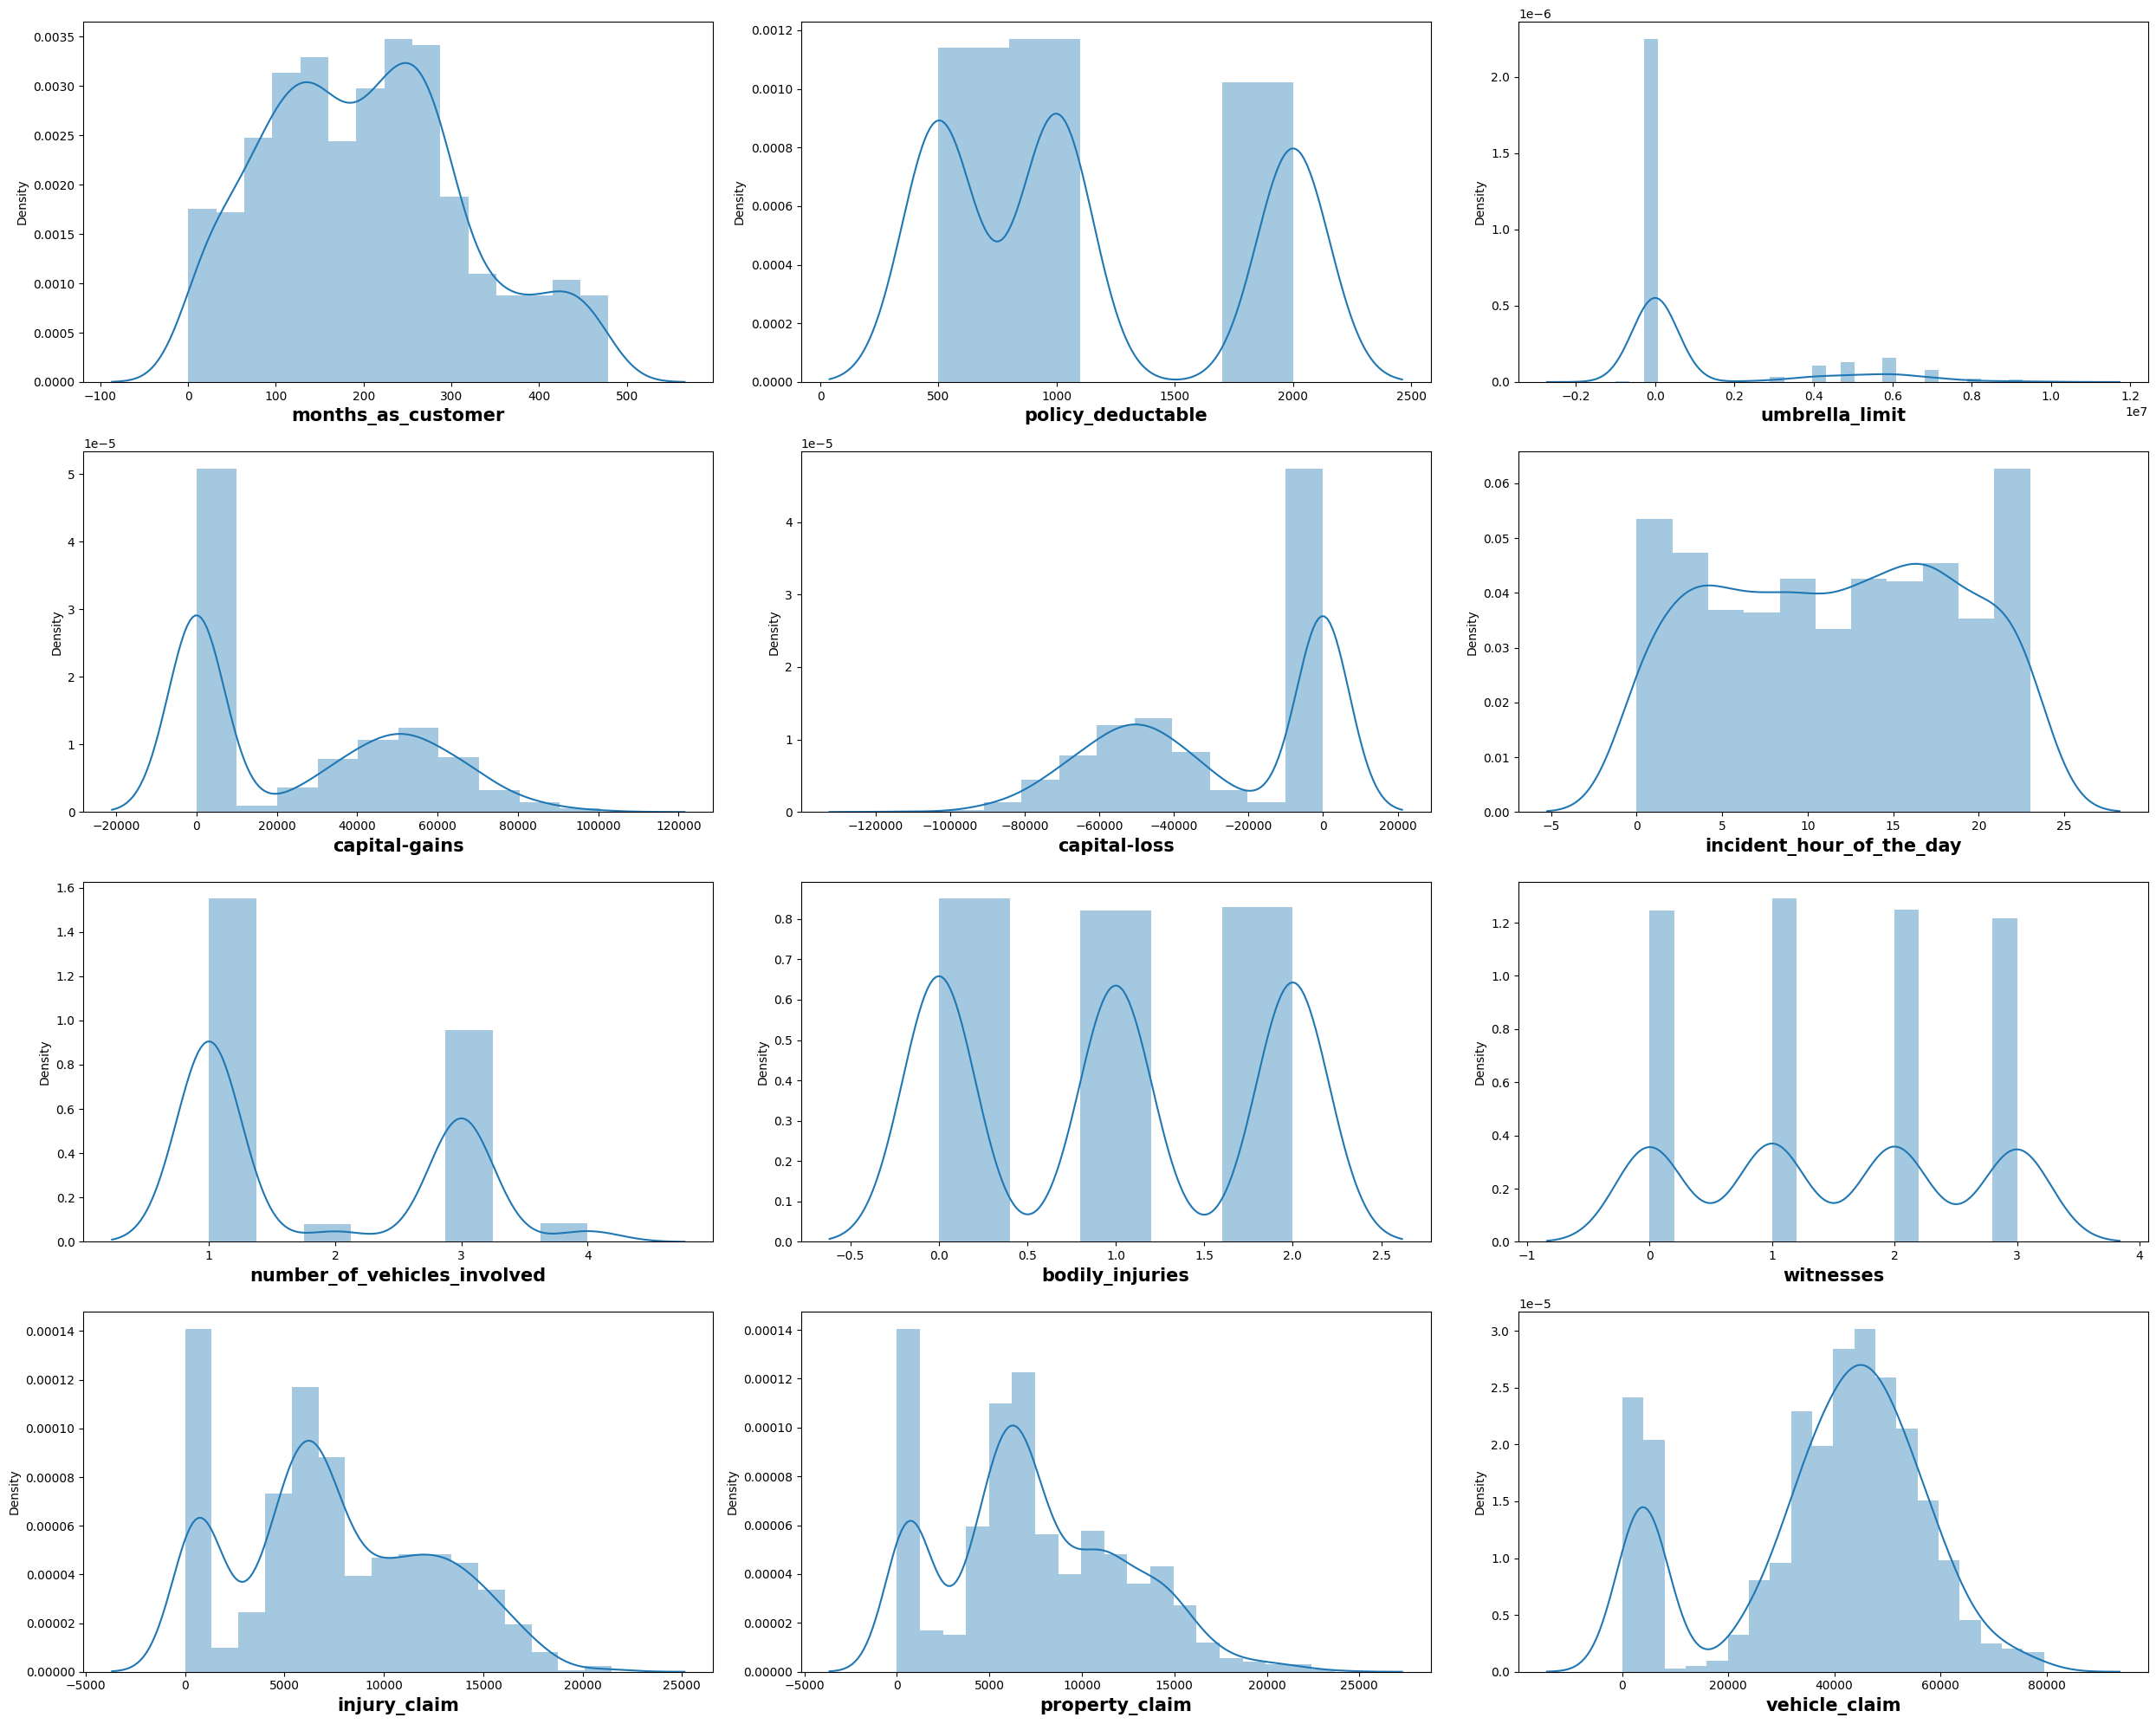

In [86]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in cols:
    if plotnumber <= 24:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15, fontweight="bold")
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

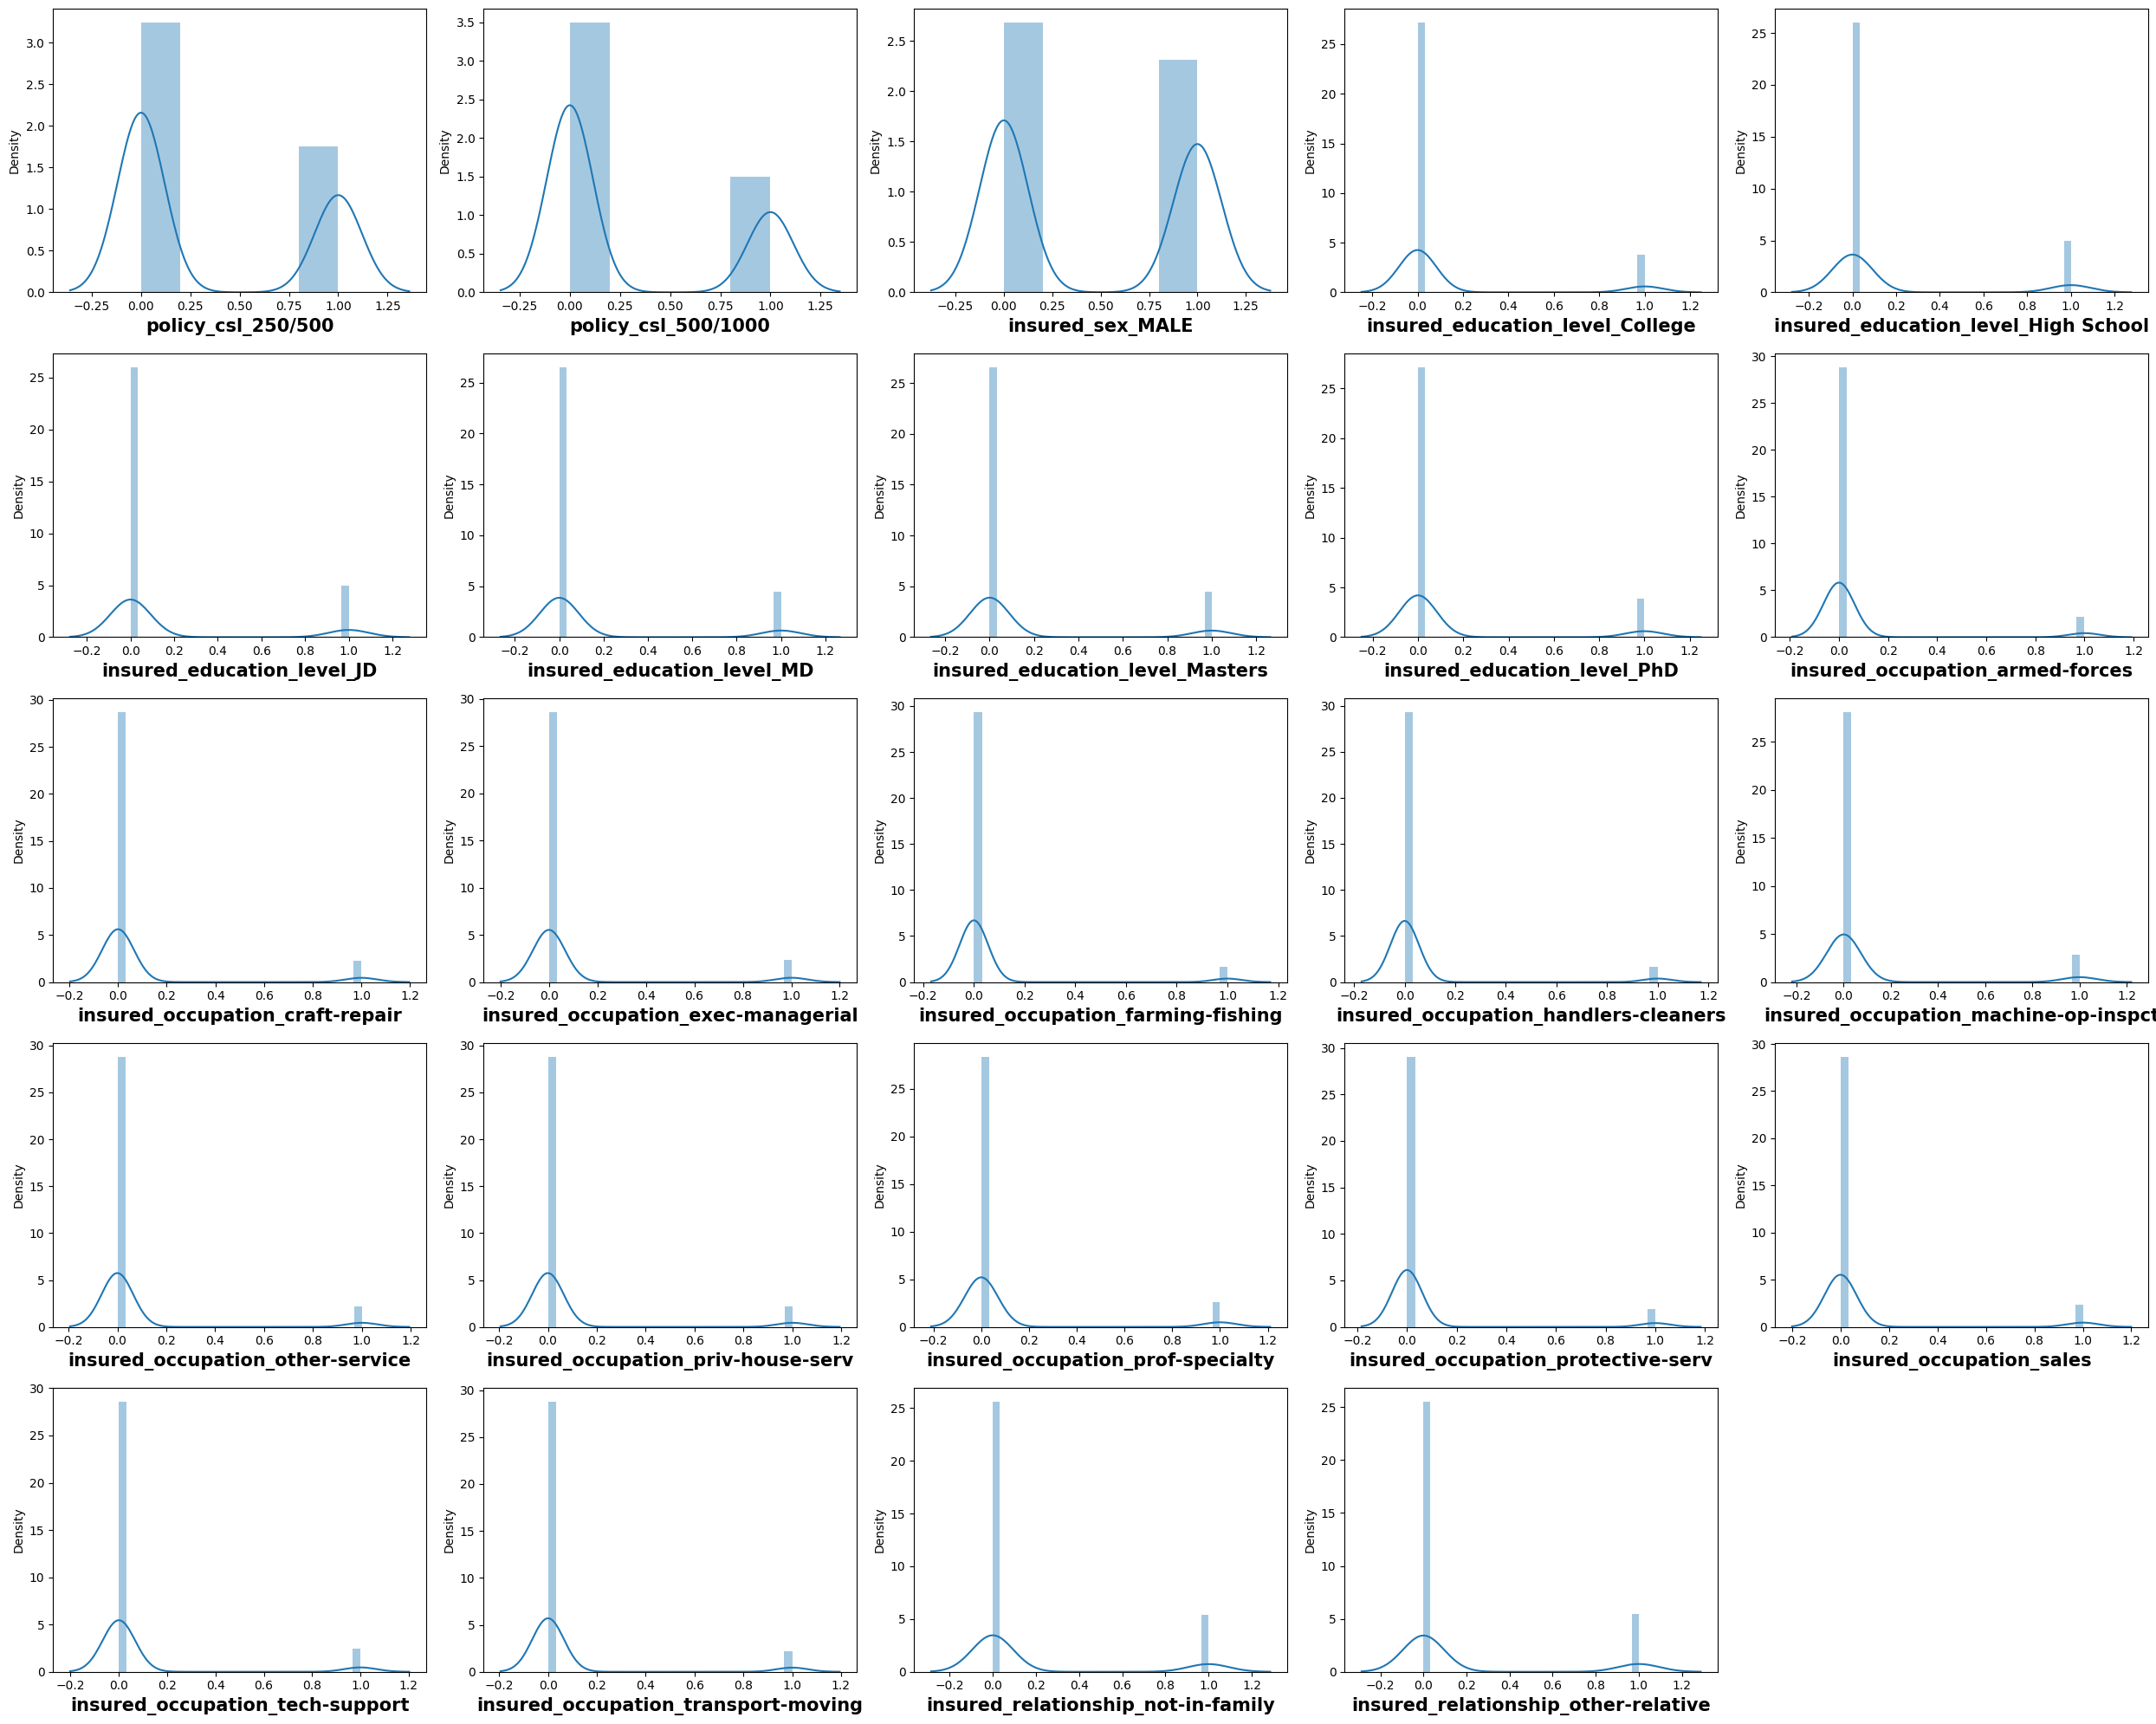

In [85]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in bools:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15, fontweight="bold")
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

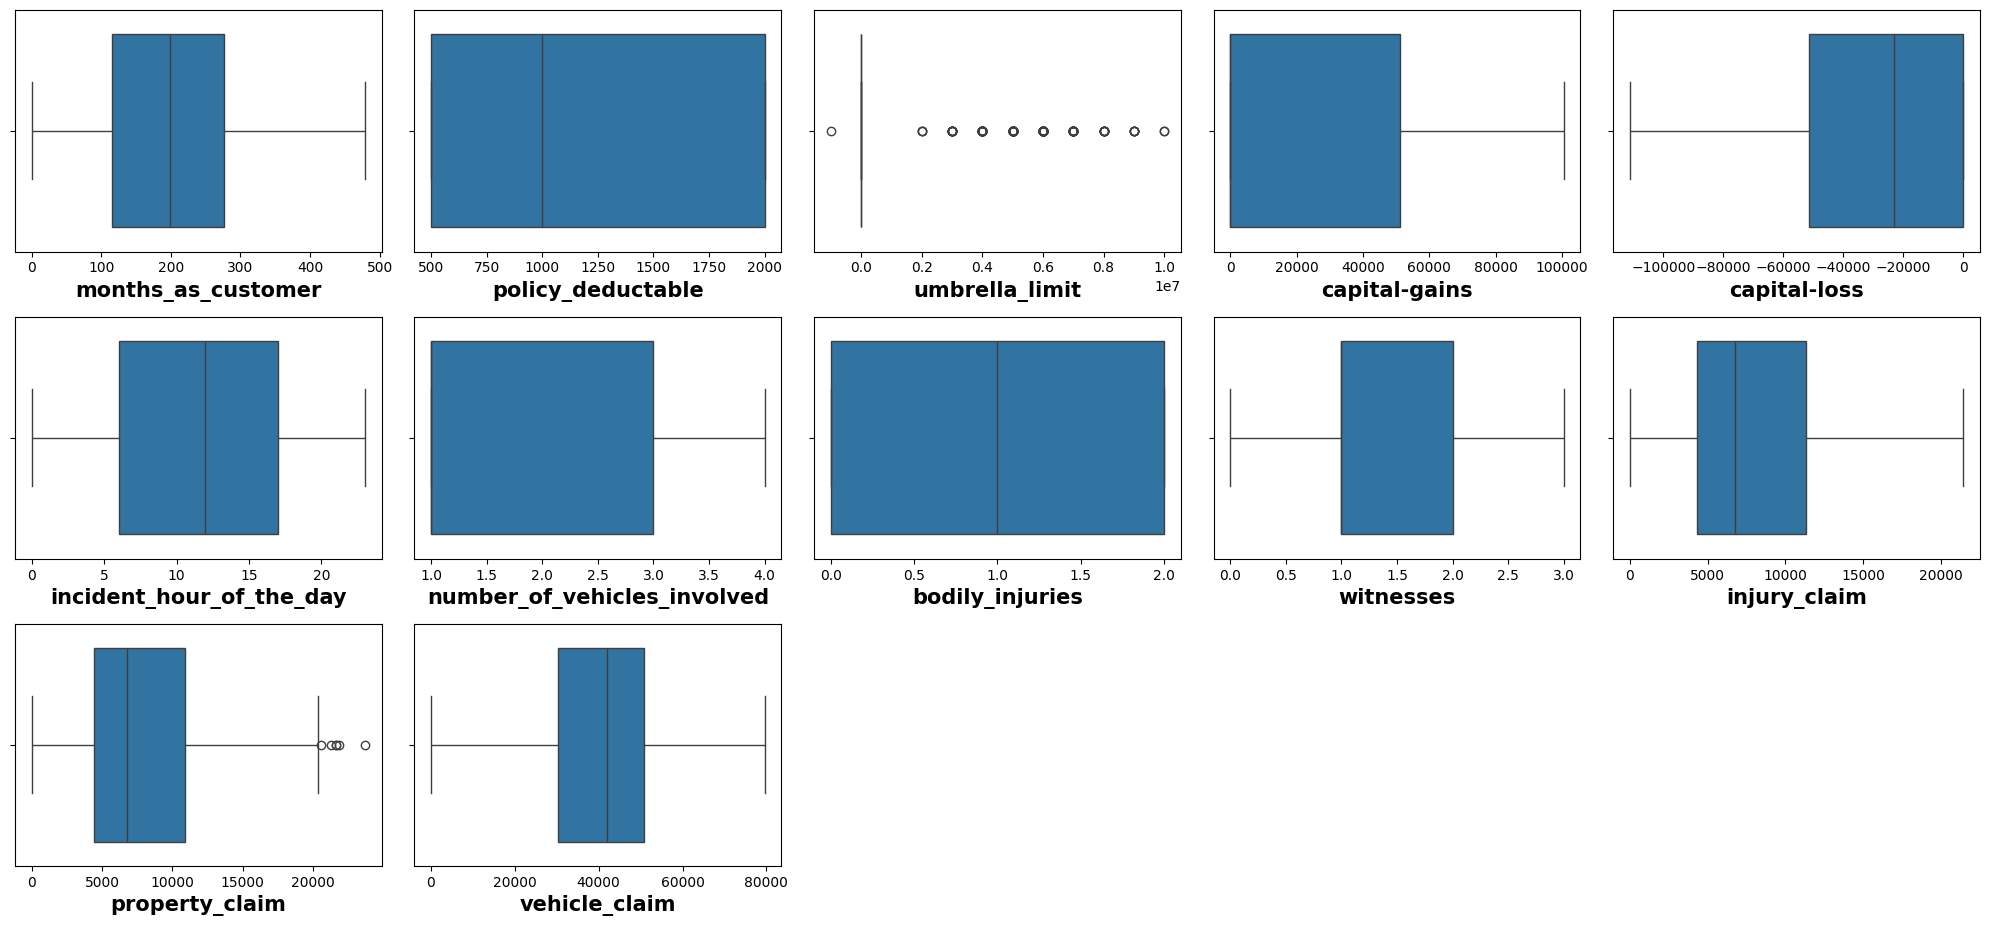

In [87]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col], orient="h")
        plt.xlabel(col, fontsize = 15, fontweight="bold")
    
    plotnumber += 1
plt.tight_layout()
plt.show()

* Outliers present. Observe outliers and apply domain knowledge, consider scaling.

In [90]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,False,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,False,False,True,False,False,False,False,True,False,False


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [113]:
cols= [x for x in X_train.select_dtypes(include=["int64"])]

In [116]:
#Scaling numerical columns
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled_data= scaler.fit_transform(num_df)

In [124]:
means= np.mean(scaled_data, axis=0)

In [132]:
stds= (np.std(scaled_data, axis=0, ddof=0))

In [136]:
print("Standard Deviations approximately equal 1:",np.allclose(stds, 1, atol=1e-15)) 

Standard Deviations approximately equal 1: True


In [138]:
print("Means approximately equal 0:",np.allclose(means, 0, atol=1e-15)) 

Means approximately equal 0: True


* The means of the 12x numerical columns are very tiny numbers, negligible. Confirming mean approx. ZERO
* The standard deviation of the 12x numerical columns are very tiny numbers, negligible. Confirming mean approx. ONE
* This validates the standardization of the data 

In [140]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)

In [144]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [145]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [146]:
X_train.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
717,-1.456724,-1.051420,1.190202,1.935646,0.965908,-1.099176,1.14668,-1.184075,1.403752,1.026848,...,False,True,True,False,False,False,False,False,False,True
701,-0.381071,-1.051420,-0.502831,0.762634,0.965908,0.788944,2.13180,1.242309,-0.417726,-0.835570,...,True,False,False,False,False,True,False,False,False,False
14,-0.224927,1.405168,-0.502831,0.602843,-0.998874,0.062744,-0.82356,-1.184075,0.493013,-0.696149,...,True,False,False,True,False,False,False,True,False,True
520,0.642535,-0.232557,-0.502831,-0.897014,-0.860808,-1.534896,-0.82356,-1.184075,0.493013,1.343146,...,False,False,False,True,False,True,False,False,False,False
900,-1.777685,1.405168,-0.502831,1.325535,0.965908,1.660384,-0.82356,-1.184075,1.403752,-0.125979,...,False,True,False,True,False,False,True,False,True,False


In [150]:
#Save datasets to directory

In [ ]:
X_train, X_test, y_train, y_test

In [152]:
path= "../data/train_test"
os.path.exists(path)

True

In [153]:
path= "../data/train_test/X_train.csv"
X_train.to_csv(path, index=False)

In [154]:
path= "../data/train_test/X_test.csv"
X_test.to_csv(path, index=False)

In [155]:
path= "../data/train_test/y_train.csv"
y_train.to_csv(path, index=False)

In [156]:
path= "../data/train_test/y_test.csv"
y_test.to_csv(path, index=False)